In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots
from scipy import sparse
import matplotlib.animation as animation
import project

In [2]:
#General plot style used in the project, and size definition
plt.style.use('science')
plt.rcParams["figure.figsize"] = (12,7)
plt.rcParams.update({"axes.grid" : True})

#### Replicating previous results with a larger network (3 neurons)

These sets of experiments are made with the purpose of setting up correctly the behaviour of larger networks of neurons. With that purpose, we are going to try to replicate the results of the GHREsults notebook, found in NeuronPairs

In [3]:
#Creating the Electrical and Chemical connectivity matrices, in this case for 3 neurons
num_neurons = 3
E_matrix,seed = project.utils.create_matrix('electrical',num_neurons)
C_matrix, seed = project.utils.create_matrix('chemical',num_neurons)

##### HH model

This will be one of the models we will focus on during these experiments, as it's the model with (probably) the more complex dynamics of all four.

In [4]:
Isyn = 0.05
params_HH = project.utils.load_HH()
k = 0.012 #strength of the gap junction coupling
tau = 1 #time constant for the chemical coupling equations
order = 2 #filtering order


#Initial conditions of the HH model
V0 = np.ones(num_neurons) * (-70)
n0 =np.ones(num_neurons)*0.2
m0 = np.ones(num_neurons)*0.1
h0 = np.ones(num_neurons)*0.6 


#time constants
dt = 0.01
t_final = 300


#Input intensities for experiment 2A
I1 = np.zeros((int(t_final/dt),num_neurons))
I2 = np.zeros((int(t_final/dt),num_neurons))

for i in range(4999,15000):
    I1[i,0] =1
    I2[i,0] = -1


data_HH_new, b, c, d = project.models.HH_Neuron_Network(dt,t_final,order,V0,n0,m0,h0,*params_HH,I1,Isyn,k,tau,E_matrix,C_matrix)

(0.0, 300.0)

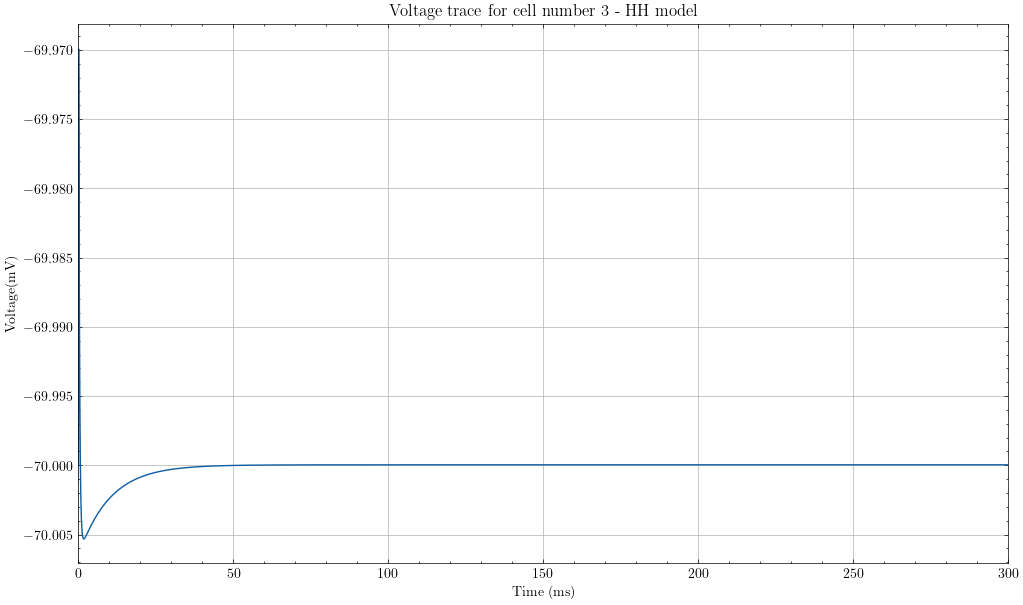

In [5]:
t = np.linspace(0,t_final,int(t_final/dt))
plt.plot(t,data_HH_new[:,2])
plt.xlabel('Time (ms)')
plt.ylabel('Voltage(mV)')
plt.title('Voltage trace for cell number 3 - HH model')
plt.xlim(0,300)

##### LIF model

Another model that we are trying to see if it works

In [6]:
params_LIF = project.utils.load_LIF()
k = 0.012
tau = 1
order = 2 #filtering order



#Initial conditions for the LIF
y0 = np.ones(num_neurons) * (-70)


#Time constants
t_final = 300
dt = 0.01 


#Input intensities for experiment 2A
I1 = np.zeros((int(t_final/dt),num_neurons))
I2 = np.zeros((int(t_final/dt),num_neurons))

for i in range(4999,15000):
    I1[i,0] =1
    I2[i,0] = -1


data_IF_new, completeIF_11, c, d = project.models.LIF_Neuron_Network(dt,t_final,order,y0,*params_LIF,I1,Isyn,k,tau,1,E_matrix,C_matrix)

(0.0, 300.0)

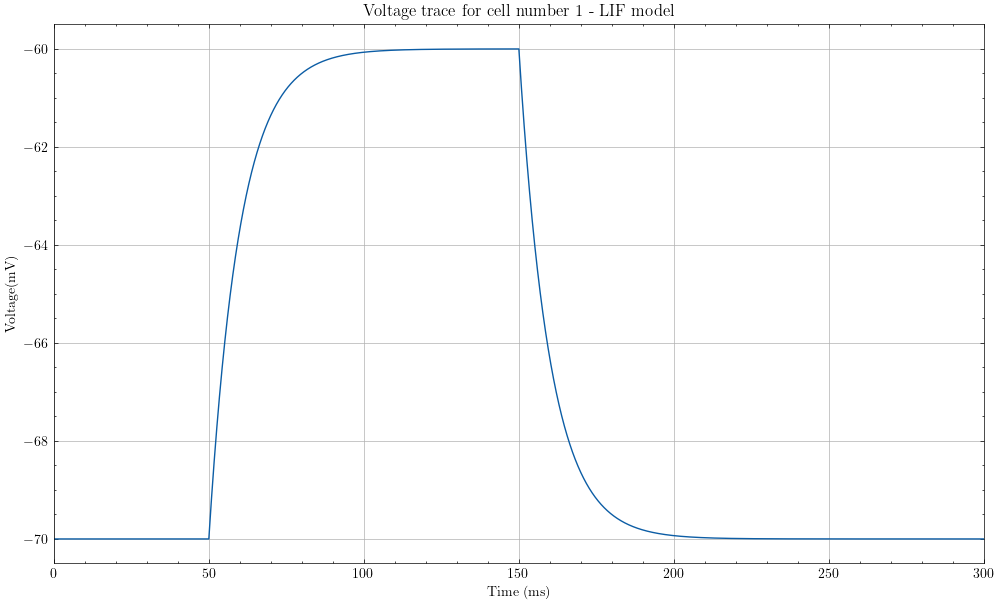

In [7]:
t = np.linspace(0,t_final,int(t_final/dt))
plt.plot(t,data_IF_new[:,0])
plt.xlabel('Time (ms)')
plt.ylabel('Voltage(mV)')
plt.title('Voltage trace for cell number 1 - LIF model')
plt.xlim(0,300)

##### IZH model

Another model that we are trying to see if it works

In [8]:
params_IZH = project.utils.load_ISH()
k_izh = 0.04
tau = 1
order = 2

#Time constants
dt = 0.01
t_final = 300


#Initial conditions for the IZH
y0 = np.ones(num_neurons) * (-70)
u0 = np.zeros(num_neurons)


#Input intensities for experiment 2A
I1 = np.zeros((int(t_final/dt),num_neurons))
I2 = np.zeros((int(t_final/dt),num_neurons))
for i in range(4999,15000):
    I1[i,0] = 1.5
    I2[i,0] = -1.5


data_ISH_new, completeISH_11, c, d = project.models.IZH_Neuron_Network(dt,t_final,order,y0,u0,I1,Isyn,*params_IZH,k_izh,tau,E_matrix,C_matrix)

/home/pablo/.local/lib/python3.10/site-packages/scipy/sparse/_base.py:651: RuntimeWarning: divide by zero encountered in double_scalars
  return self.astype(np.float_)._mul_scalar(1./other)


(0.0, 300.0)

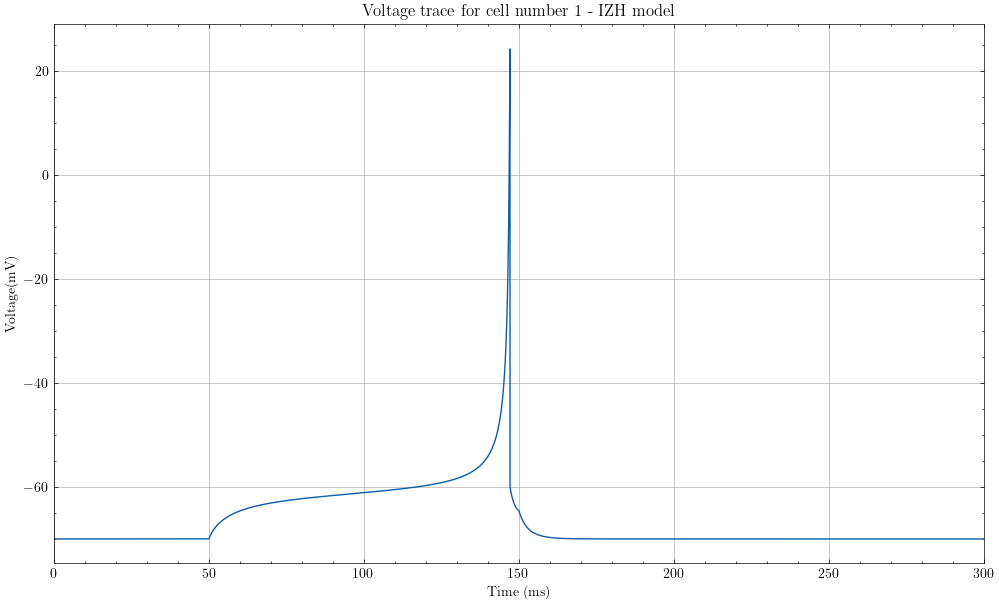

In [9]:
t = np.linspace(0,t_final,int(t_final/dt))
plt.plot(t,data_ISH_new[:,0])
plt.xlabel('Time (ms)')
plt.ylabel('Voltage(mV)')
plt.title('Voltage trace for cell number 1 - IZH model')
plt.xlim(0,300)

##### ML model

The last model that we are looking at

In [10]:
params_ML = project.utils.load_ML()
order = 2
k_ML = 0.008
tau = 1


#Time constants
dt = 0.01
t_final = 300


#Initial conditions for the ML
y0 = np.ones(num_neurons)*(-71.7061740390072)
w0 = np.ones(num_neurons) * (0.0007223855976593603)


#Input intensities for experiment 2A
I1 = np.zeros((int(t_final/dt),num_neurons))
I2 = np.zeros((int(t_final/dt),num_neurons))
for i in range(4999,15000):
    I1[i,0] = 0.5
    I2[i,0] = -0.5


data_ML_new, b, c, d = project.models.ML_Neuron_Network(dt,t_final,order,y0,w0,*params_ML,I1,Isyn,k_ML,tau,E_matrix,C_matrix)#data2ish, completeIsh2 = rk_ish(dt,t_final,order,y0,u0,I2,Is,*params_IZH,k_izh,tau,E_matrix,C_matrix)

(0.0, 300.0)

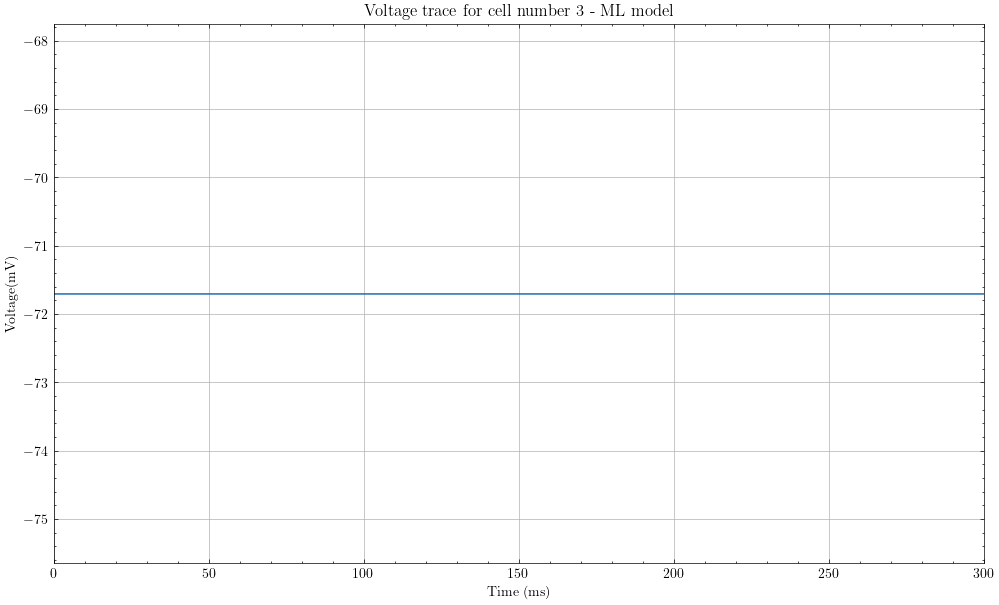

In [11]:
t = np.linspace(0,t_final,int(t_final/dt))
plt.plot(t,data_ML_new[:,2])
plt.xlabel('Time (ms)')
plt.ylabel('Voltage(mV)')
plt.title('Voltage trace for cell number 3 - ML model')
plt.xlim(0,300)

#### Post-Threshold Dynamics

After checking the behaviour of the models for sub-threshold inputs, we are moving on to observe the post-threshold dynamics

##### HH model

This will be one of the models we will focus on during these experiments, as it's the model with (probably) the more complex dynamics of all four.

In [12]:
tau = 0.3
order = 5
Isyn = 0.05

#Time constants
dt = 0.01
t_final =200 


#Initial conditions for the HH
V0 = np.ones(num_neurons)*(-60)
n0 = np.ones(num_neurons)*0.2 
m0 = np.ones(num_neurons)*0.1 
h0 = np.ones(num_neurons)*0.6 


#Input intensities for experiment 6
I = np.zeros((int(t_final/dt), num_neurons))
x1 = np.random.normal(0,5,int(t_final/dt))
x2 = np.random.normal(0,5,int(t_final/dt))
I[:,0] = 2.0 + 5 *x1 
I[:,1] = 1.5 + 5*x2 
I[:,2] = 1.0 + 5*x2 


data_HH_new_6, b, c, d = project.models.HH_Neuron_Network(dt,t_final,order,V0,n0,m0,h0,*params_HH,I,Isyn,k,tau,E_matrix,C_matrix)

(0.0, 200.0)

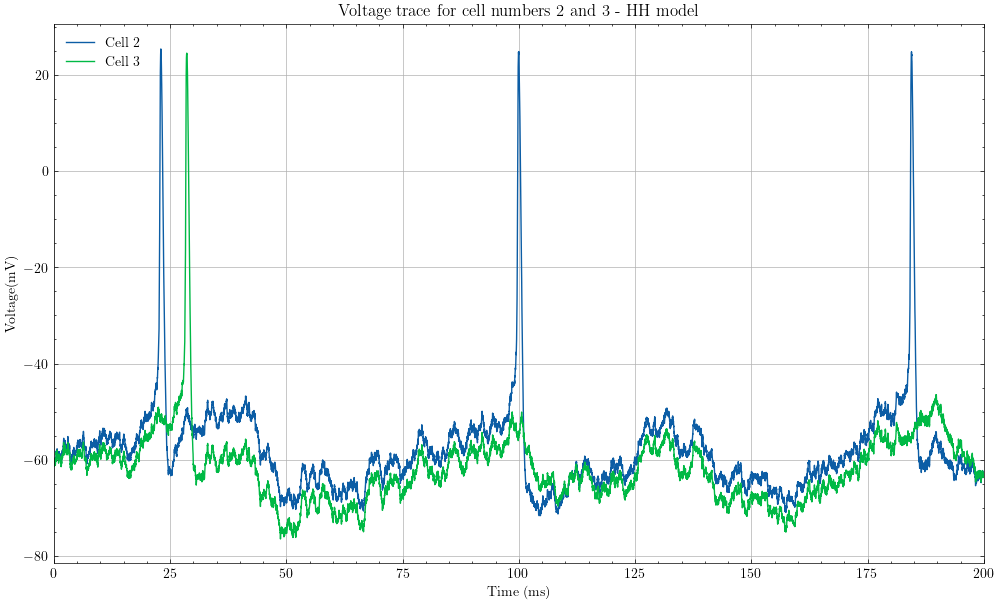

In [13]:
t = np.linspace(0,t_final,int(t_final/dt))
plt.plot(t,data_HH_new_6[:,1], label = 'Cell 2')
plt.plot(t,data_HH_new_6[:,2], label = 'Cell 3')
plt.xlabel('Time (ms)')
plt.legend()
plt.ylabel('Voltage(mV)')
plt.title('Voltage trace for cell numbers 2 and 3 - HH model')
plt.xlim(0,200)

##### LIF model

Another model that we are trying to see if it works

In [14]:
tau = 0.65
Isyn = 0.05


#Initial conditions for the LIF
y0 = np.ones(num_neurons)*(-60)


#Time constants
dt = 0.01
t_final = 200


data_IF_new_2, completeIF_11_2, c, d = project.models.LIF_Neuron_Network(dt,t_final,order,y0,*params_LIF,I,Isyn,k,tau,1,E_matrix,C_matrix)

(0.0, 200.0)

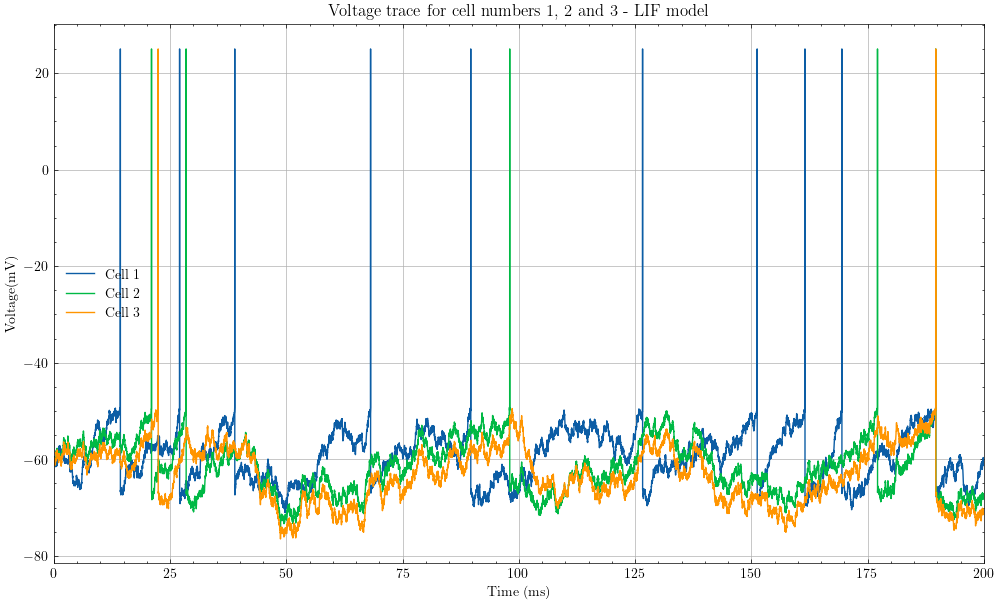

In [15]:
t = np.linspace(0,t_final,int(t_final/dt))
plt.plot(t,data_IF_new_2[:,0],label = 'Cell 1')
plt.plot(t,data_IF_new_2[:,1], label = 'Cell 2')
plt.plot(t,data_IF_new_2[:,2], label = 'Cell 3')
plt.xlabel('Time (ms)')
plt.legend()
plt.ylabel('Voltage(mV)')
plt.title('Voltage trace for cell numbers 1, 2 and 3 - LIF model')
plt.xlim(0,200)

##### IZH model

Another model that we are trying to see if it works

In [16]:
#Initial conditions for the IZH
y0 = np.ones(num_neurons) * (-70)
u0 = np.zeros(num_neurons)


data_ISH_new_2, completeISH_11_2, c, d = project.models.IZH_Neuron_Network(dt,t_final,order,y0,u0,I,Isyn,*params_IZH,k_izh,tau,E_matrix,C_matrix)

(0.0, 200.0)

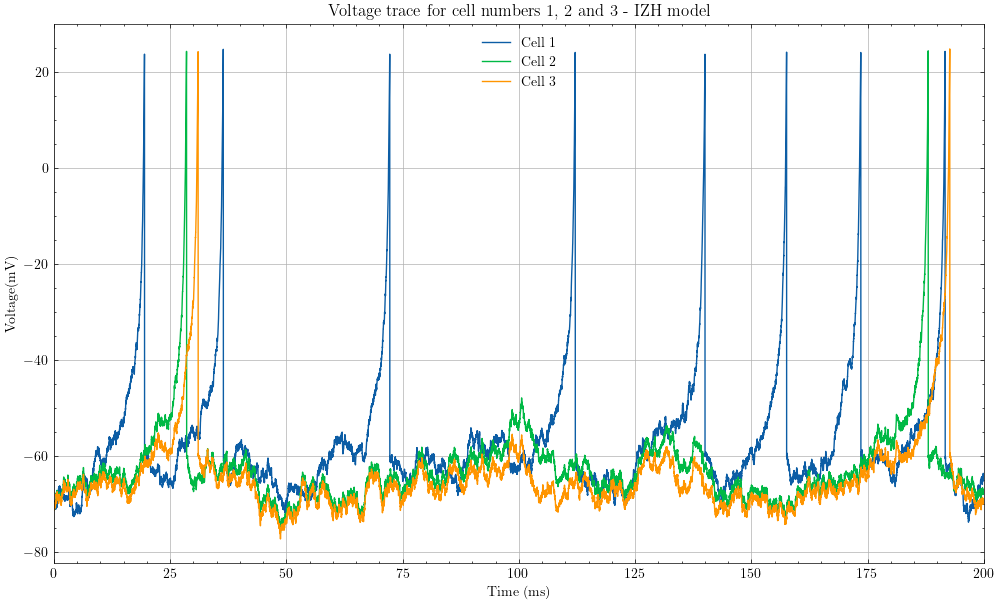

In [17]:
t = np.linspace(0,t_final,int(t_final/dt))
plt.plot(t,data_ISH_new_2[:,0], label = 'Cell 1')
plt.plot(t,data_ISH_new_2[:,1], label = 'Cell 2')
plt.plot(t,data_ISH_new_2[:,2], label = 'Cell 3')
plt.xlabel('Time (ms)')
plt.legend()
plt.ylabel('Voltage(mV)')
plt.title('Voltage trace for cell numbers 1, 2 and 3 - IZH model')
plt.xlim(0,200)

##### ML model

The last model that we are looking at

In [18]:
#Initial conditions for the ML
y0 = np.ones(num_neurons)*(-71.7061740390072)
w0 = np.ones(num_neurons) * (0.0007223855976593603)


data_ML_new_2, b, c, d = project.models.ML_Neuron_Network(dt,t_final,order,y0,w0,*params_ML,I,Isyn,k_ML,tau,E_matrix,C_matrix)

(0.0, 200.0)

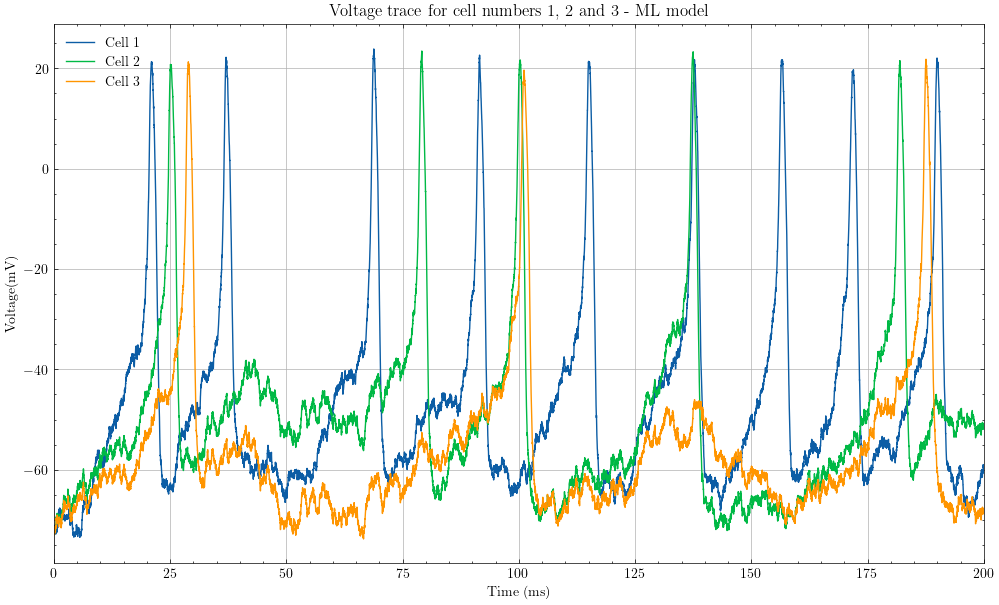

In [19]:
t = np.linspace(0,t_final,int(t_final/dt))
plt.plot(t,data_ML_new_2[:,0], label = 'Cell 1')
plt.plot(t,data_ML_new_2[:,1], label = 'Cell 2')
plt.plot(t,data_ML_new_2[:,2], label = 'Cell 3')
plt.xlabel('Time (ms)')
plt.legend()
plt.ylabel('Voltage(mV)')
plt.title('Voltage trace for cell numbers 1, 2 and 3 - ML model')
plt.xlim(0,200)